In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scripts import (
    load_joined_data,
    remove_seasonality_ia,
)

START = datetime(2021, 4, 1, 9, 30)
END = datetime(2022, 4, 1, 16, 0)
BUCKET = 600  # seconds

COLUMNS = ["VOLUME_fut", "VOLUME_etf", "VOLUME_opt"]
TARGET = "VOLUME_fut_target"

# Loading data

In [2]:
# ts = load_joined_data(common_kwargs=dict(start=START, end=END, bucket=BUCKET))

In [3]:
# load cached data
ts = load_joined_data(
    pd.read_csv('./data/etf_nq.csv', index_col='Time'),
    pd.read_csv('./data/fut_nq.csv', index_col='Time'),
    pd.read_csv('./data/opt_nq.csv', index_col='Time'),
)
ts

,Time,VOLUME_fut,VOLUME_etf,VOLUME_opt,hhmm,VOLUME_fut_target
0,2021-04-01 09:40:00,31967,5787283,20914,940,31967
1,2021-04-01 09:50:00,13194,3001767,14998,950,13194
2,2021-04-01 10:00:00,9774,1523707,9644,1000,9774
3,2021-04-01 10:10:00,26026,3199697,17938,1010,26026
4,2021-04-01 10:20:00,10889,2662730,12092,1020,10889
...,...,...,...,...,...,...
9846,2022-03-31 15:20:00,8872,1283681,18724,1520,8872
9847,2022-03-31 15:30:00,12924,1501646,12523,1530,12924
9848,2022-03-31 15:40:00,16582,1970892,18835,1540,16582
9849,2022-03-31 15:50:00,13761,2629317,15626,1550,13761


# Raw data overview

<AxesSubplot:xlabel='Time'>

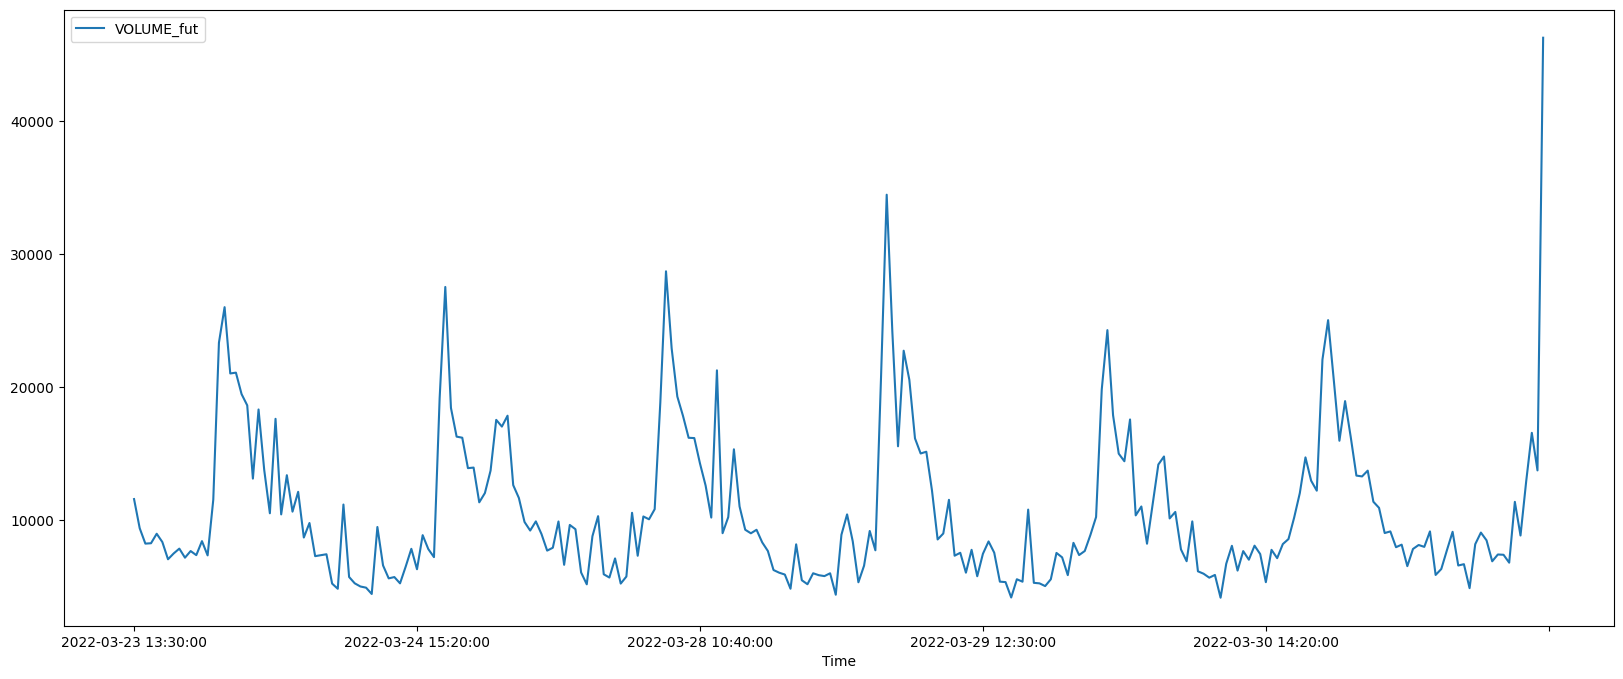

In [4]:
ts.iloc[-250:].plot(y='VOLUME_fut', x='Time', figsize=[20, 8])

## Autocorrelation

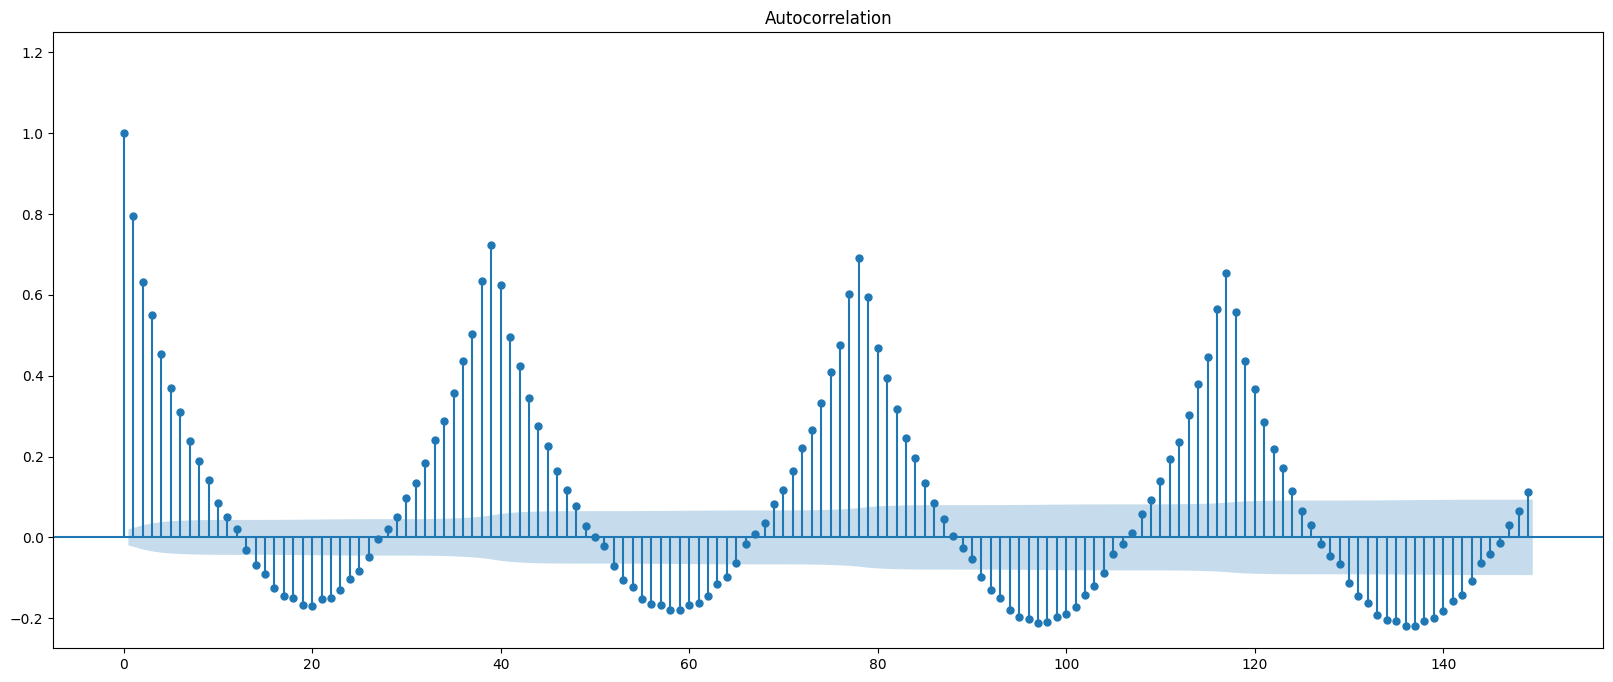

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))
plt_pacf = plot_acf(ts['VOLUME_fut'], ax=ax, lags=np.arange(150), auto_ylims=True)

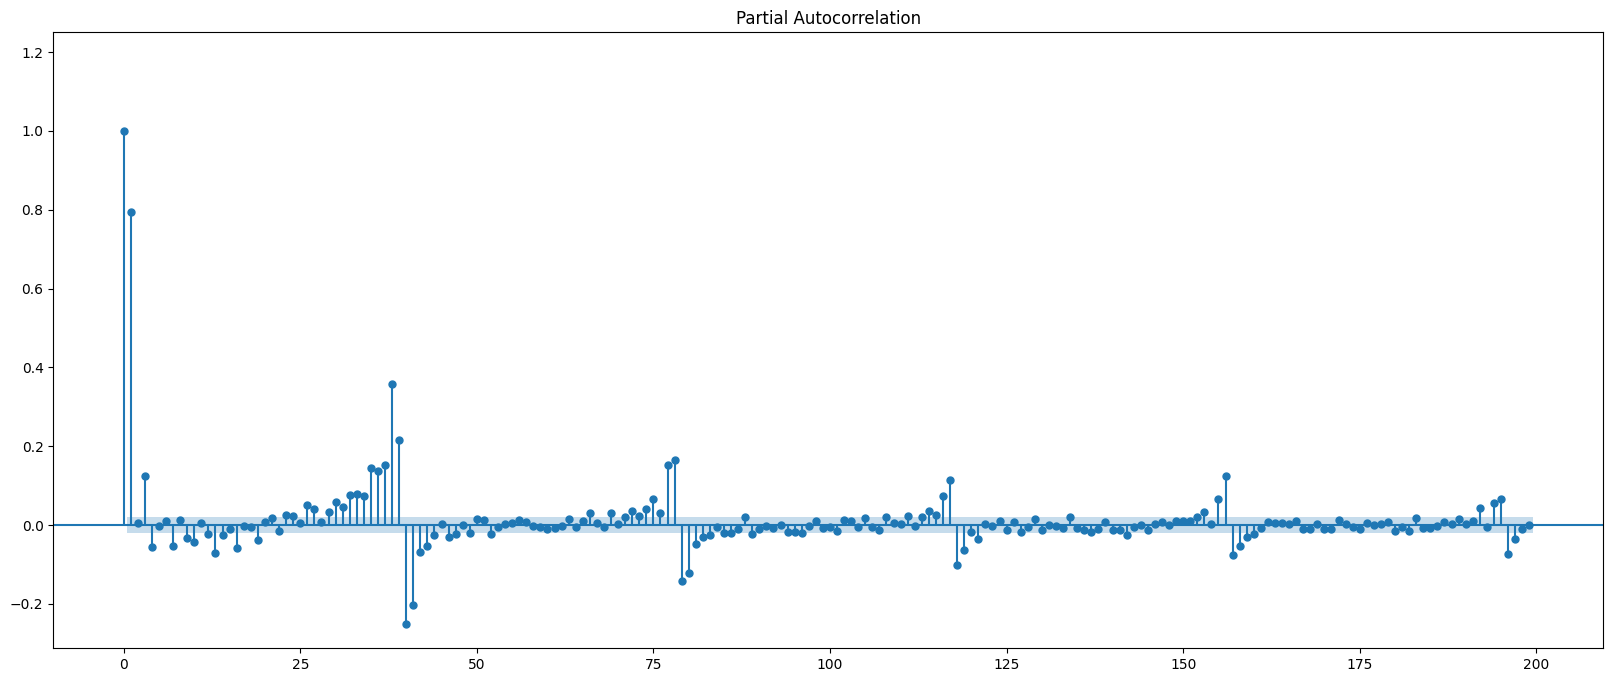

In [6]:
# Partial autocorrelation plots
fig, ax = plt.subplots(figsize=(20, 8))
plt_pacf = plot_pacf(ts['VOLUME_fut'], ax=ax, lags=np.arange(200), auto_ylims=True, method='ywm')

## Intraday seasonality

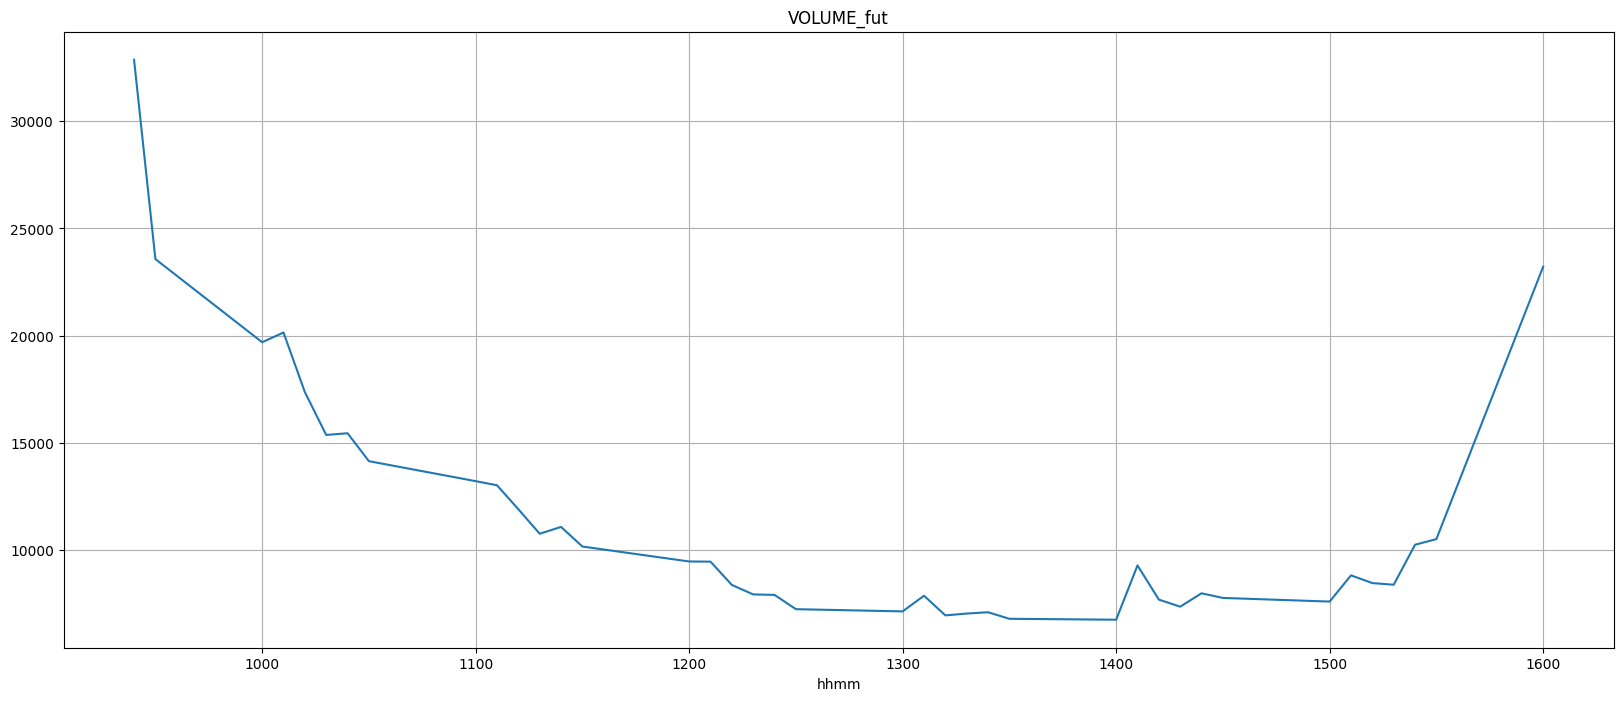

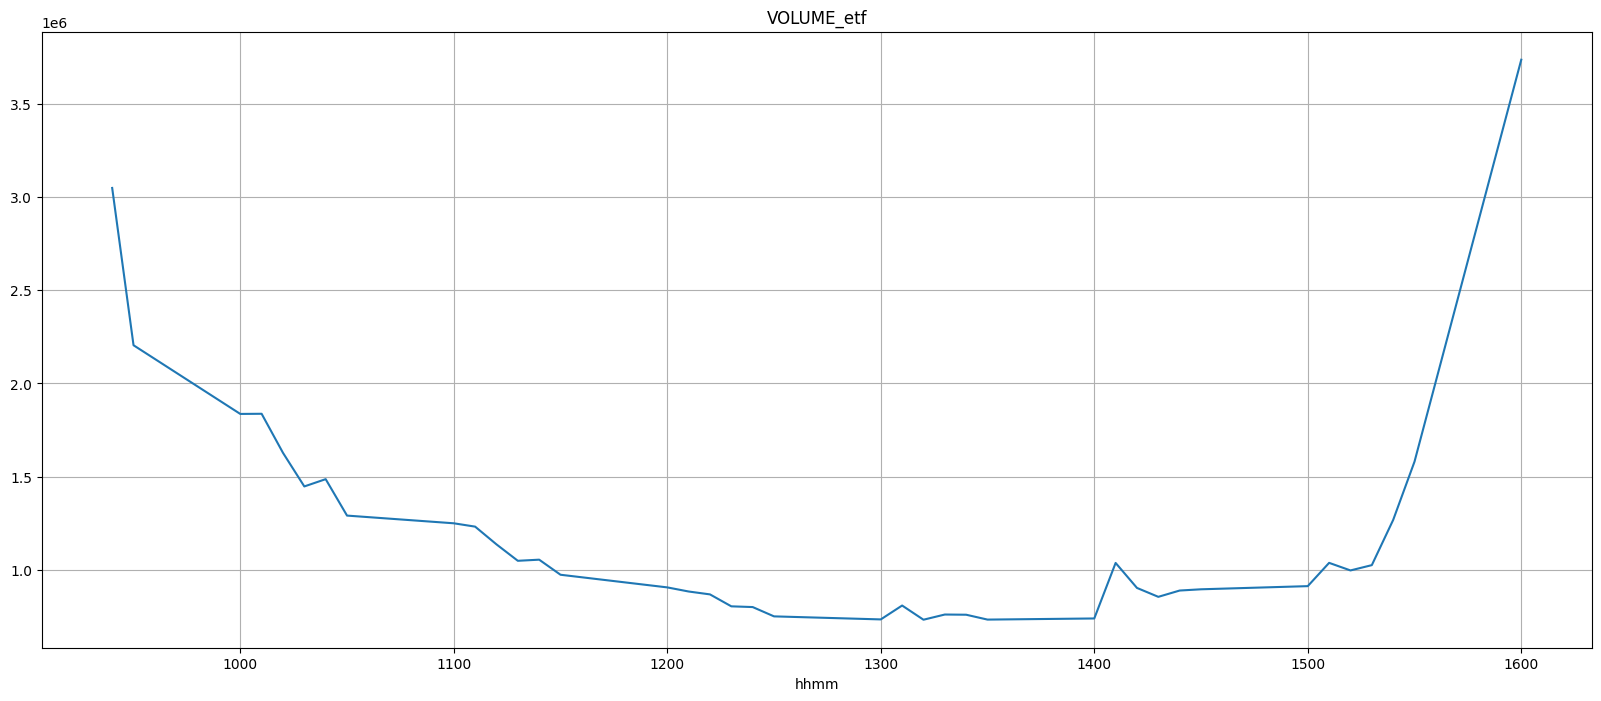

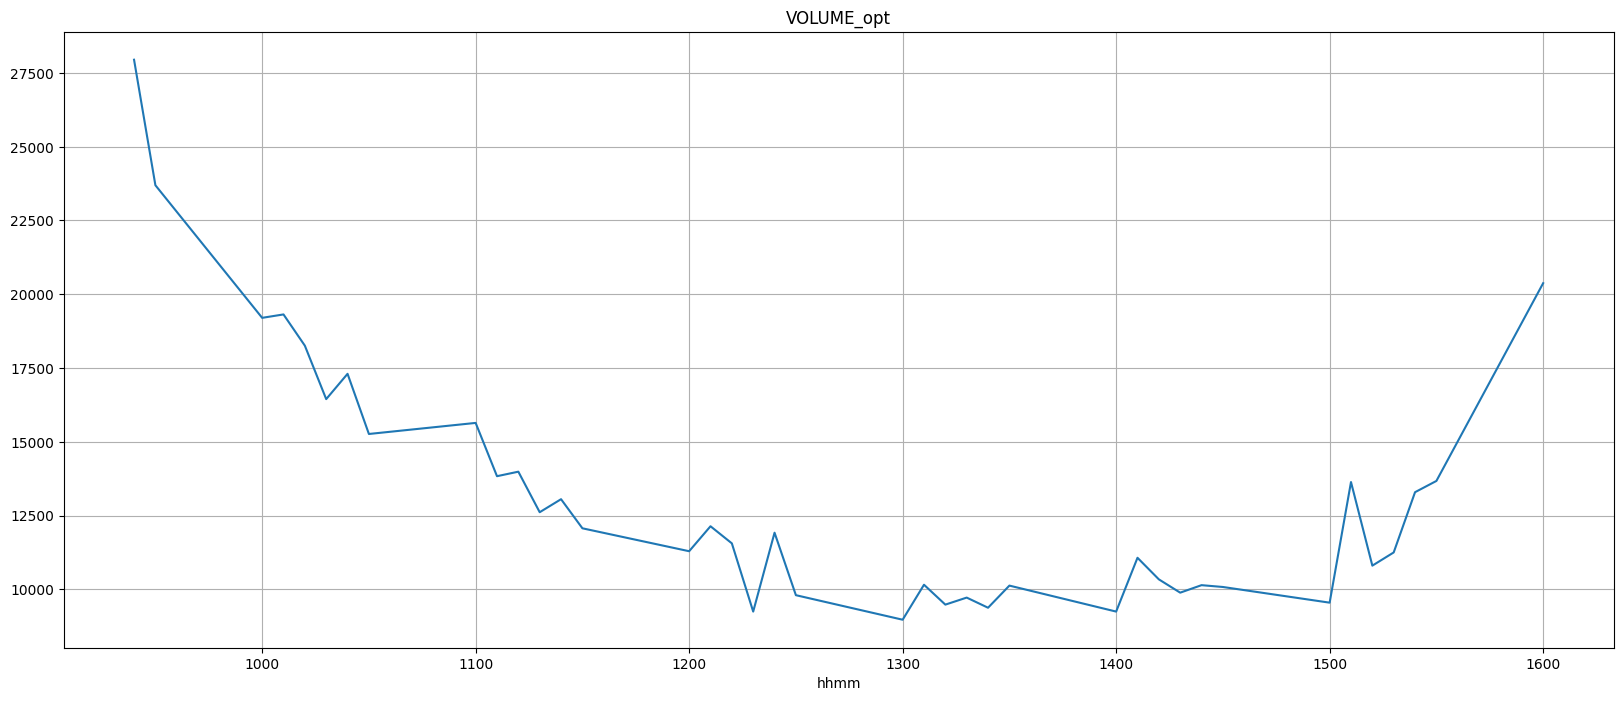

In [7]:
# Volume profile (average)
ts_agg = ts.groupby('hhmm').mean()

for column in COLUMNS:
    fig, ax = plt.subplots(figsize=(20, 8))
    ax = ts_agg[column].plot(ax=ax, title=column)
    ax.grid()

# Normalizing Bucket Values by Historical Averages

In [8]:
df = remove_seasonality_ia(ts, COLUMNS, bins=39, window_days=20)
df['Time'] = ts['Time']
df.dropna(inplace=True)
df

,VOLUME_fut,VOLUME_etf,VOLUME_opt,VOLUME_fut_target,VOLUME_fut_agg,Time
780,-2691.60,124326.95,25493.20,-2691.60,28600.60,2021-04-30 09:40:00
781,-1790.65,-287446.05,5996.90,-1790.65,20238.65,2021-04-30 09:50:00
782,25.50,-24788.40,2799.75,25.50,17406.50,2021-04-30 10:00:00
783,-1511.85,-224423.00,4216.80,-1511.85,18005.85,2021-04-30 10:10:00
784,-533.40,-423786.10,-3865.65,-533.40,15143.40,2021-04-30 10:20:00
...,...,...,...,...,...,...
9846,-1088.95,-196412.95,5730.90,-1088.95,9960.95,2022-03-31 15:20:00
9847,3112.50,-201669.65,-2514.45,3112.50,9811.50,2022-03-31 15:30:00
9848,5850.40,129857.30,4249.65,5850.40,10731.60,2022-03-31 15:40:00
9849,2469.05,417053.10,298.05,2469.05,11291.95,2022-03-31 15:50:00


# Processed data overview

<AxesSubplot:xlabel='Time'>

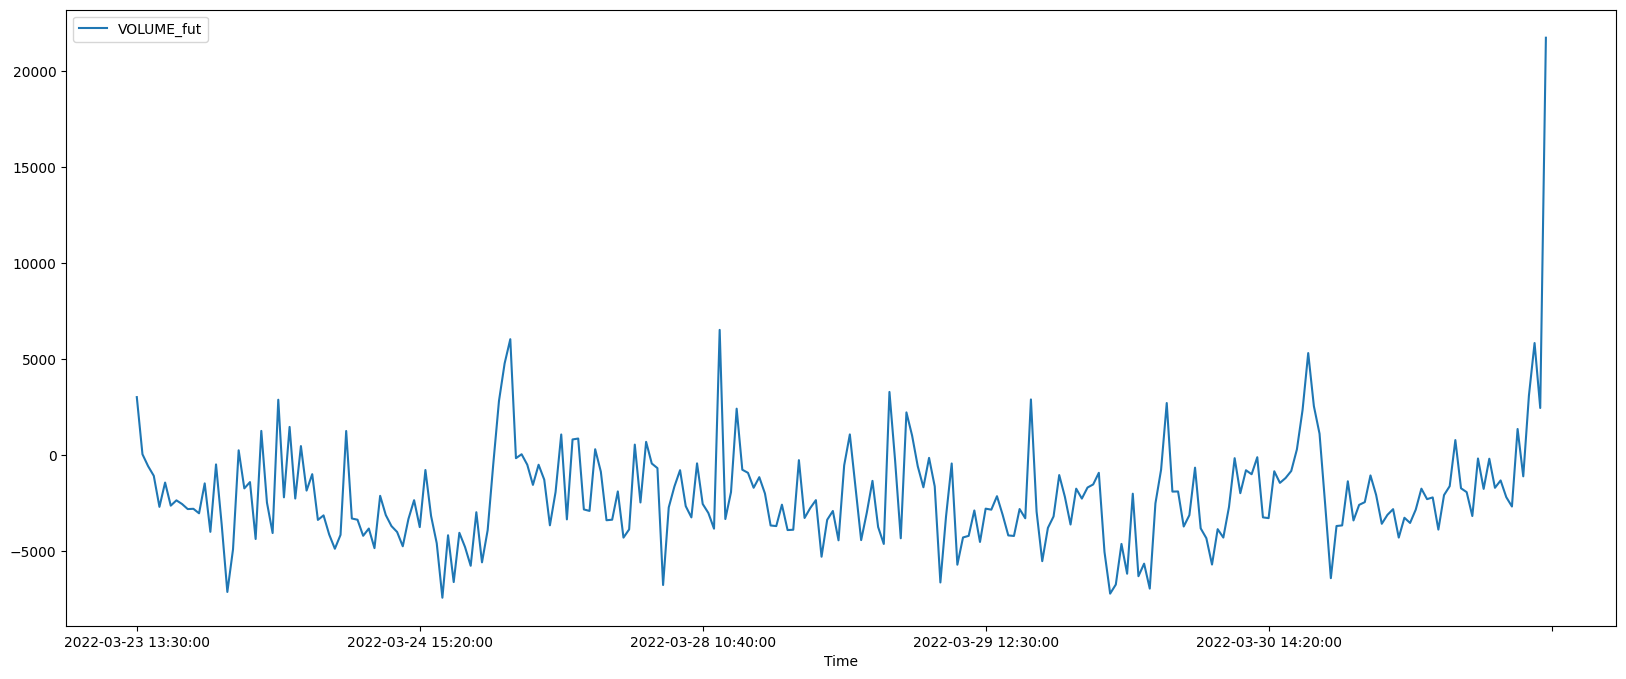

In [9]:
df.iloc[-250:].plot(y='VOLUME_fut', x='Time', figsize=[20, 8])

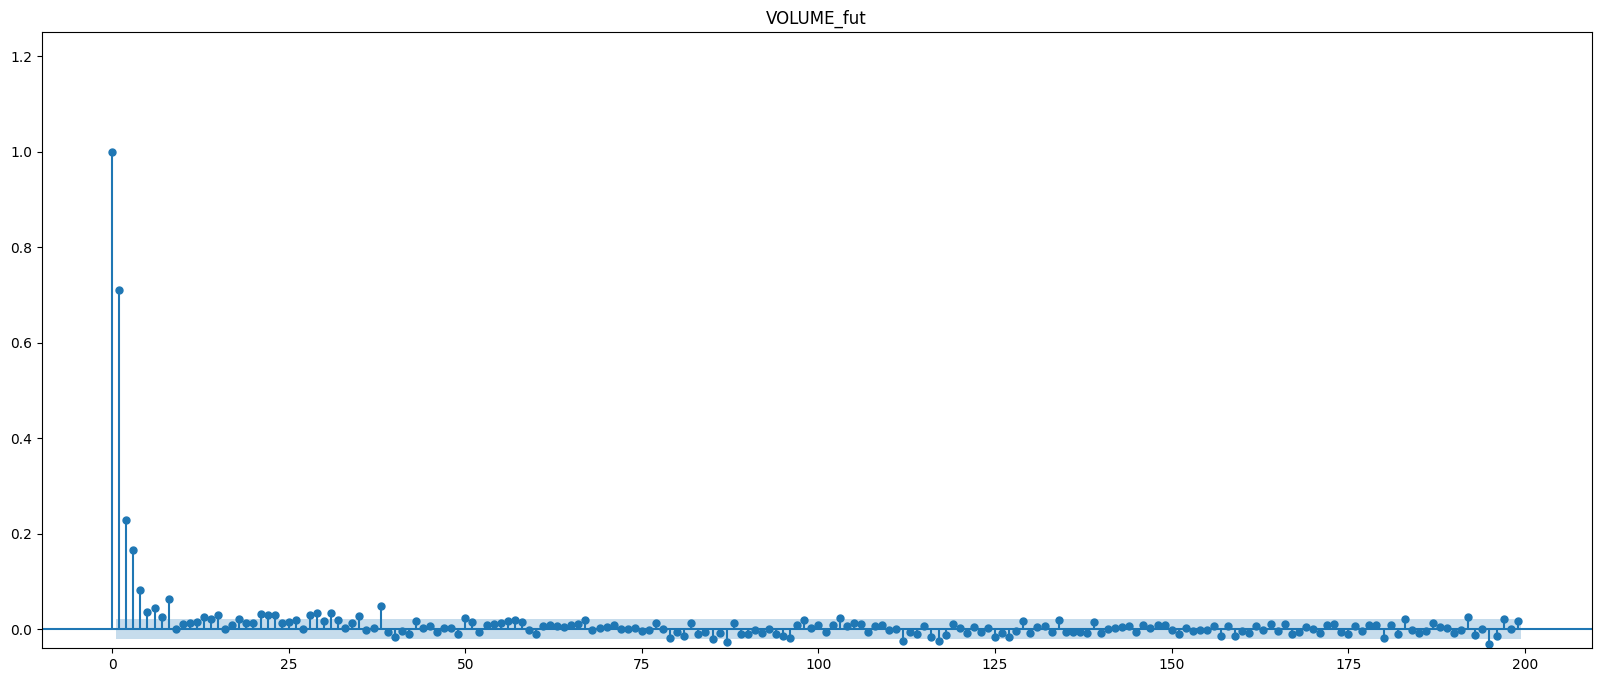

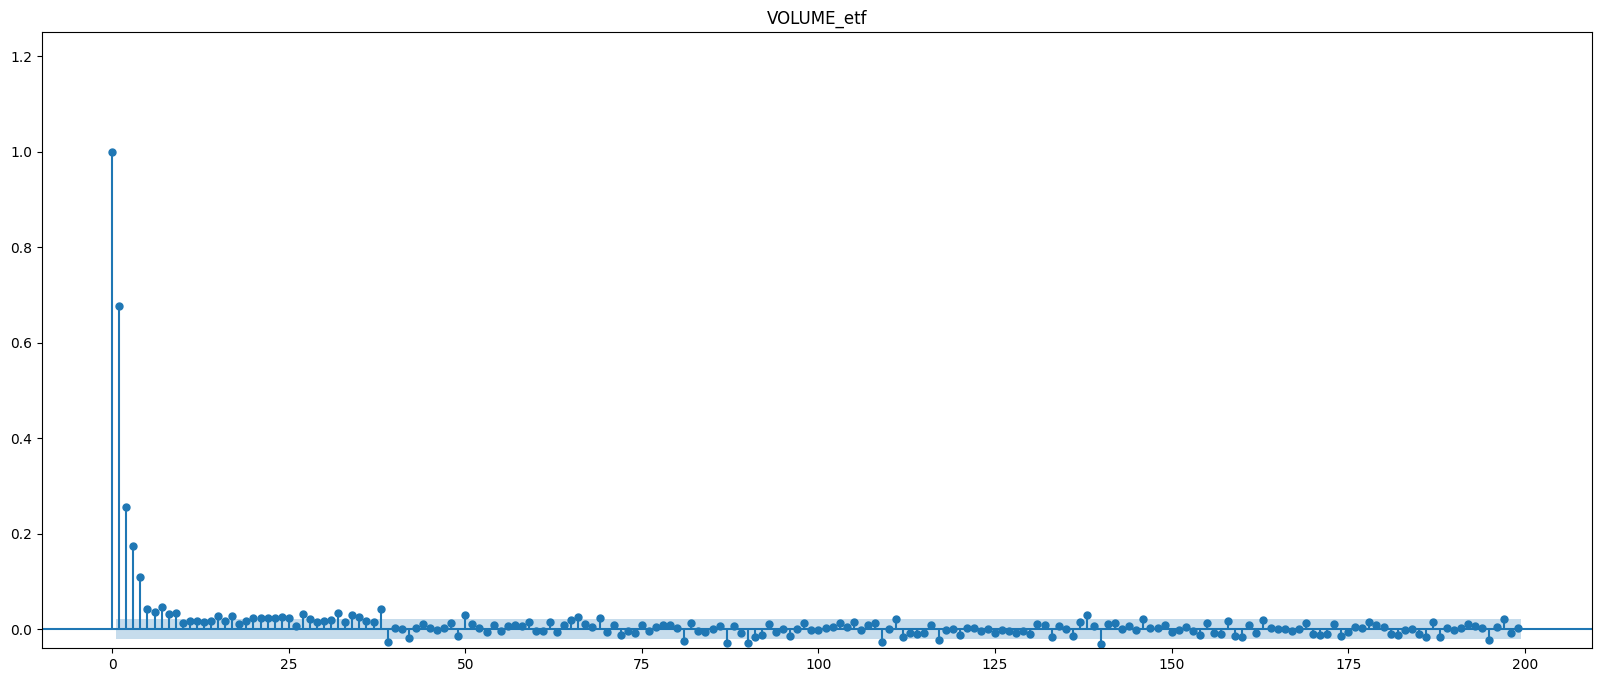

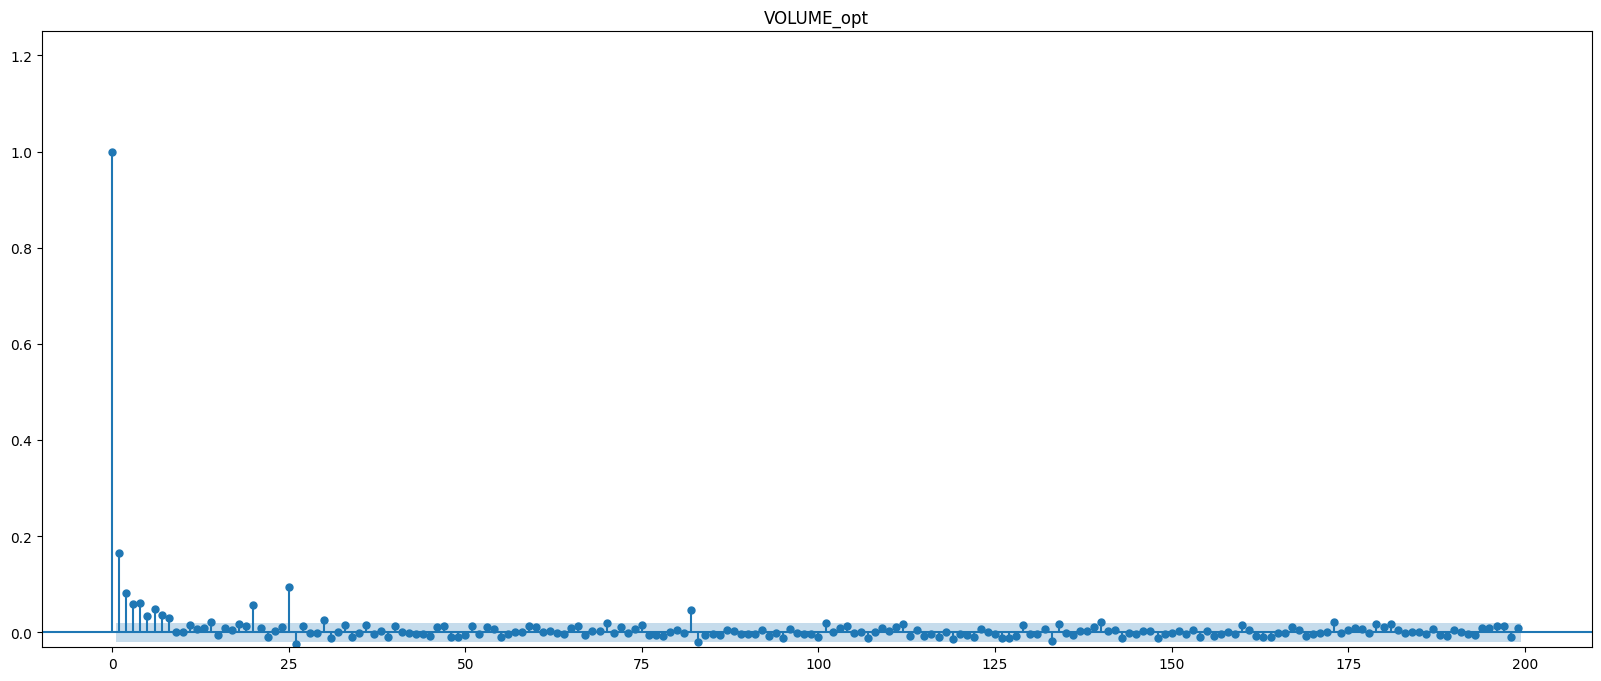

In [10]:
# Partial autocorrelation plots
for column in COLUMNS:
    fig, ax = plt.subplots(figsize=(20, 8))
    plt_pacf = plot_pacf(df[column].dropna(), ax=ax, lags=np.arange(200), auto_ylims=True, method='ywm', title=column)